# Practical Machine Learning Assignment Report: Supervised Learning Methods Comparison 
## Random Forest & Multilayer Perceptron
### Author: Matei Bejan

My goal for this project is to compare those two regressors by predicting the Gross Domestic Product growth on the WDI dataset.

The data used in this script is the transposed WDI data, computed by the transposed_indicators.ipynb script. Please run that script before continuing, as the original WDI data set's structure is not for modelling.

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import some utility libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Load transposed WDI data set

In [4]:
indicators = pd.read_csv('/content/gdrive/My Drive/An 1 Masters/PML/transposed_indicators.csv')

indicators.shape

(13830, 1346)

Filter out the features with more than 50% NaN counts

In [0]:
columns = indicators.columns

new_columns = []

for column in columns:
  no_of_nonNANs = indicators[column].count()
  shape = indicators[column].shape
  percentage_of_nonNANs = 100 * float(no_of_nonNANs) / float(shape[0])
  if percentage_of_nonNANs >= 50:
    new_columns.append(column)

indicators_filtered = pd.DataFrame(columns = new_columns)

indicators_filtered = indicators[new_columns]

In [0]:
country_names = indicators['CountryName']

GDP_current_US_dollars = indicators_filtered['GDP growth (annual %)']

Select all columns with 10% NaNs

In [0]:
columns = indicators_filtered.columns

new_columns = []

for column in columns:
  no_of_nonNANs = indicators_filtered[column].count()
  shape = indicators_filtered[column].shape
  percentage_of_nonNANs = 100 * float(no_of_nonNANs) / float(shape[0])
  if percentage_of_nonNANs >= 90:
    new_columns.append(column)

indicators_f90 = pd.DataFrame(columns = new_columns)

indicators_f90 = indicators[new_columns]

Perform KNN imputation on the previously selected data with k = 1

In [8]:
from fancyimpute import KNN

country_names = indicators_f90['CountryName']

columns_f90 = indicators_f90.columns

indicators_f90 = indicators_f90[indicators_f90.columns[1:]]

indicators_f90_knn_imputed = KNN(k = 1).fit_transform(indicators_f90)

Imputing row 1/13830 with 3 missing, elapsed time: 28.476
Imputing row 101/13830 with 0 missing, elapsed time: 28.478
Imputing row 201/13830 with 3 missing, elapsed time: 28.486
Imputing row 301/13830 with 0 missing, elapsed time: 28.499
Imputing row 401/13830 with 0 missing, elapsed time: 28.501
Imputing row 501/13830 with 0 missing, elapsed time: 28.502
Imputing row 601/13830 with 0 missing, elapsed time: 28.505
Imputing row 701/13830 with 0 missing, elapsed time: 28.507
Imputing row 801/13830 with 0 missing, elapsed time: 28.509
Imputing row 901/13830 with 0 missing, elapsed time: 28.512
Imputing row 1001/13830 with 0 missing, elapsed time: 28.513
Imputing row 1101/13830 with 3 missing, elapsed time: 28.520
Imputing row 1201/13830 with 0 missing, elapsed time: 28.523
Imputing row 1301/13830 with 0 missing, elapsed time: 28.538
Imputing row 1401/13830 with 3 missing, elapsed time: 28.540
Imputing row 1501/13830 with 0 missing, elapsed time: 28.542
Imputing row 1601/13830 with 0 missi

Add the imputed data to the dataset

In [0]:
indicators_f90_knn_imputed = pd.DataFrame(data = indicators_f90_knn_imputed, columns = columns_f90[1:])

for column in list(indicators_f90_knn_imputed.columns[1:]):
  indicators_filtered.assign(column=indicators_f90_knn_imputed[column])

Select all columns with 30% NaNs

In [0]:
columns = indicators_filtered.columns

new_columns = []

for column in columns:
  no_of_nonNANs = indicators_filtered[column].count()
  shape = indicators_filtered[column].shape
  percentage_of_nonNANs = 100 * float(no_of_nonNANs) / float(shape[0])
  if percentage_of_nonNANs >= 70:
    new_columns.append(column)

indicators_f70 = pd.DataFrame(columns = new_columns)

indicators_f70 = indicators[new_columns]

Perform KNN imputation on the previously selected data with k = 3

In [11]:
from fancyimpute import KNN

country_names = indicators_f70['CountryName']

columns_f70 = indicators_f70.columns

indicators_f70 = indicators_f70[indicators_f70.columns[1:]]

indicators_f70_knn_imputed = KNN(k = 3).fit_transform(indicators_f70)

Imputing row 1/13830 with 27 missing, elapsed time: 72.890
Imputing row 101/13830 with 1 missing, elapsed time: 72.965
Imputing row 201/13830 with 42 missing, elapsed time: 73.077
Imputing row 301/13830 with 15 missing, elapsed time: 73.323
Imputing row 401/13830 with 9 missing, elapsed time: 73.391
Imputing row 501/13830 with 4 missing, elapsed time: 73.418
Imputing row 601/13830 with 13 missing, elapsed time: 73.612
Imputing row 701/13830 with 0 missing, elapsed time: 73.644
Imputing row 801/13830 with 1 missing, elapsed time: 73.750
Imputing row 901/13830 with 14 missing, elapsed time: 73.804
Imputing row 1001/13830 with 1 missing, elapsed time: 73.838
Imputing row 1101/13830 with 21 missing, elapsed time: 73.980
Imputing row 1201/13830 with 0 missing, elapsed time: 74.009
Imputing row 1301/13830 with 18 missing, elapsed time: 74.146
Imputing row 1401/13830 with 41 missing, elapsed time: 74.192
Imputing row 1501/13830 with 7 missing, elapsed time: 74.322
Imputing row 1601/13830 with

Add the imputed data to the dataset

In [0]:
indicators_f70_knn_imputed = pd.DataFrame(data = indicators_f70_knn_imputed, columns = columns_f70[1:])

for column in list(indicators_f70_knn_imputed.columns[1:]):
  indicators_filtered.assign(column=indicators_f70_knn_imputed[column])

Perform biscaling on our data and apply softimpute in order to infer the rest of the NaNs

In [13]:
from fancyimpute import BiScaler, SoftImpute

country_names = indicators_filtered['CountryName']

years = indicators_filtered['Year']

indicators_np = indicators_filtered.drop(labels = ['CountryName'], axis = 1).select_dtypes(include=[np.float, np.int]).as_matrix()

indicators_incomplete_normalized = BiScaler().fit_transform(indicators_np)
indicators_softimpute = SoftImpute().fit_transform(indicators_incomplete_normalized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[BiScaler] Initial log residual value = 69.794085
[BiScaler] Iter 1: log residual = 8.031118, log improvement ratio=61.762967
[BiScaler] Iter 2: log residual = 7.659885, log improvement ratio=0.371233
[BiScaler] Iter 3: log residual = 7.110393, log improvement ratio=0.549492
[BiScaler] Iter 4: log residual = 6.655284, log improvement ratio=0.455109
[BiScaler] Iter 5: log residual = 6.163634, log improvement ratio=0.491650
[BiScaler] Iter 6: log residual = 5.673850, log improvement ratio=0.489784
[BiScaler] Iter 7: log residual = 5.171920, log improvement ratio=0.501930
[BiScaler] Iter 8: log residual = 4.659179, log improvement ratio=0.512741
[BiScaler] Iter 9: log residual = 4.220166, log improvement ratio=0.439013
[BiScaler] Iter 10: log residual = 3.856079, log improvement ratio=0.364087
[BiScaler] Iter 11: log residual = 3.574396, log improvement ratio=0.281683
[BiScaler] Iter 12: log residual = 3.373301, log improvement ratio=0.201095
[BiScaler] Iter 13: log residual = 3.240145, l

Save our new, imputed data

In [0]:
indicators_fn = pd.DataFrame(data = indicators_softimpute, columns = indicators_filtered.columns[1:])

Drop the normalized years

In [0]:
indicators_fn.drop(labels = ['Year'], axis = 1, inplace = True)

Add the country names and the years

In [0]:
indicators_fn.insert(0, 'CountryName', country_names)

indicators_fn.insert(1, 'Year', years)

In [17]:
indicators_fn.head()

,CountryName,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Arms imports (SIPRI trend indicator values),"Birth rate, crude (per 1,000 people)",CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from liquid fuel consumption (kt),"Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Merchandise exports (current US$),Merchandise exports by the reporting economy (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Merchandise exports to developing economies in Latin America & the Caribbean (% of total merchandise exports),Merchandise exports to developing economies in Middle East & North Africa (% of total merchandise exports),Merchandise exports to developing economies in South Asia (% of total merchandise exports),Merchandise exports to developing economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to developing economies outside region (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise imports (current US$),Merchandise imports by the reporting economy (current US$),"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Merchandise imports from developing economies in East Asia & Pacific (% of total merchandise imports),Merchandise imports from developing economies in Latin America & the Caribbean (% of total merchandise imports),Merchandise imports from developing economies in Middle East & North Africa (% of total merchandise imports),Merchandise imports from developing economies in South Asia (% of total merchandise imports),Merchandise imports from developing economies in Sub-Saharan Africa (% of total merchandise imports),Merchandise imports from developing economies outside region (% of total merchandise imports),Merchandise imports from economies in the Arab World (% of total merchandise imports),Merchandise imports from high-income economies (% of total merchandise imports),...,Food exports (% of merchandise exports),Food imports (% of merchandise imports),Fuel imports (% of merchandise imports),Manufactures exports (% of merchandise exports),Manufactures imports (% of merchandise imports),Ores and metals exports (% of merchandise exports),Ores and metals imports (% of merchandise imports),"Net official flows from UN agencies, UNDP (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),Adjusted savings: natural resources depletion (% of GNI),"Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide","Enrolment in primary education, both sexes (number)","Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",Forest rents (% of GDP),"Gross enrolment ratio, primary, both sexes (%)","Gross enrolment ratio, primary, female (%)","Gross enrolment ratio, primary, gender parity index (GPI)","Gross enrolment ratio, primary, male (%)","Gross enrolment ratio, secondary, both sexes (%)",Percentage of students in primary education who are female (%),Percentage of students in secondary general education who are female (%)

Save data to drive

In [0]:
indicators_fn.to_csv('/content/gdrive/My Drive/An 1 Masters/PML/indicators_filled_normalized.csv', index = False)

It is important to understand that the GDP can be calculated as either the sum of expenditure or income indicators. 

This means that predicting the GDP for a certain year based on the same years' data is futile, as the GDP has a linear dependency in relation to certain features. In order for the regression to make sense, I have replaced each year's GDP with the consecutive year's GDP and eliminated the data for the year 2015, as it is the last observed year. 

With the data in this format, the models can predict next year's GDP based on the current's data.

In [0]:
remember_olde = 0

first_flag = True

last_year = 0

for index, row in indicators_fn[::-1].iterrows():
  if (last_year == 1960 or first_flag == True) and row['Year'] in [2014, 2015]:
    remember_olde = row['GDP growth (annual %)']
    indicators_fn.drop(index = index, inplace = True)
    first_flag = False
  last_year = row['Year']
  remember_new = row['GDP growth (annual %)']
  row['GDP growth (annual %)'] = remember_olde
  remember_olde = remember_new

Read data from drive as a checkpoint

In [0]:
indicators_fn = pd.read_csv('/content/gdrive/My Drive/An 1 Masters/PML/indicators_filled_normalized.csv')

country_names = indicators_fn['CountryName']

gdp_current_us_dollars = indicators_fn['GDP growth (annual %)']

## LassoCV

Import necessary libraries, perform a 70-30 train-test split and fit the LassoCV model

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    indicators_fn.drop(labels = ['CountryName', 'GDP growth (annual %)'], axis = 1),
    indicators_fn['GDP growth (annual %)'],
    test_size = 0.3,
    random_state = 0)

In [0]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [58]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.005, 0.0005], tol = 0.001, selection = 'random').fit(X_train, y_train)
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

0.060504082976605075

Gather the coefficients Lasso has chosen, print how many features have been filtered in and out and plot the top 10 best scores and worse scores

In [59]:
coefs = pd.Series(model_lasso.coef_, index = X_train.columns)
coefs.head()

Year                                                             0.000243
Adolescent fertility rate (births per 1,000 women ages 15-19)    0.008041
Age dependency ratio (% of working-age population)              -0.000000
Age dependency ratio, old (% of working-age population)         -0.002181
Age dependency ratio, young (% of working-age population)        0.000000
dtype: float64

In [60]:
print("Lasso picked " + str(sum(coefs != 0)) + " variables and eliminated the other " +  str(sum(coefs == 0)) + " variables")

Lasso picked 106 variables and eliminated the other 117 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

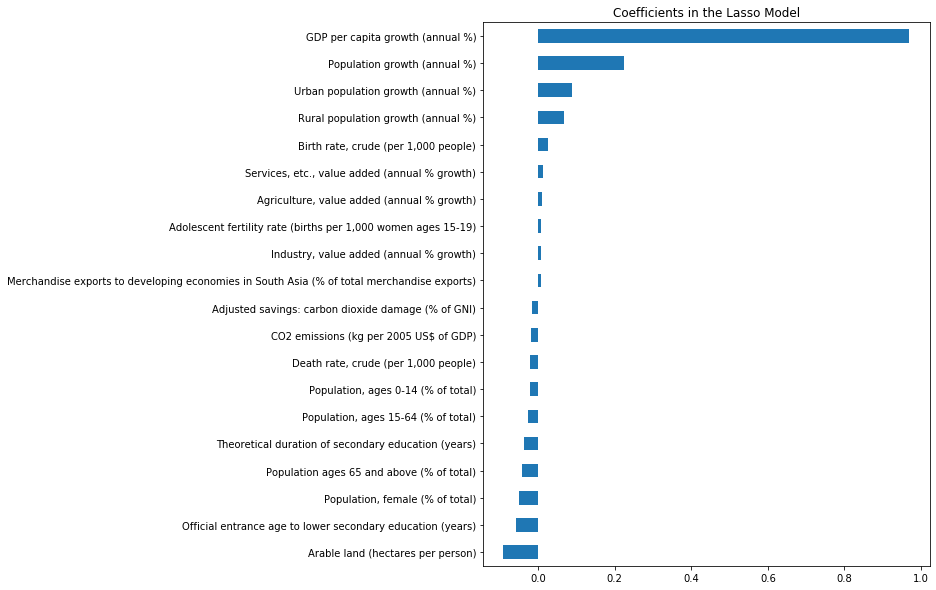

In [61]:
imp_coefs = pd.concat([coefs.sort_values().head(10), 
                          coefs.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

Filter dataset and add extra features in case Lasso selected less than 100 features

In [0]:
columns_filtered_lasso = [feature for feature, score in zip(list(coefs.index), coefs) if score != 0]

In [0]:
remainder_lasso = [feature for feature, score in zip(list(coefs.index), coefs) if score == 0]

In [0]:
if 100 < len(columns_filtered_lasso):
  for i in range(100 - len(columns_filtered_lasso)):
    columns_filtered_lasso.append(remainder_lasso[i])

In [0]:
indicators_fn = indicators_fn[columns_filtered_lasso]

In [0]:
indicators_fn.insert(0, 'CountryName', country_names)

indicators_fn.insert(71, 'GDP growth (annual %)', gdp_current_us_dollars)

Save Lasso-filtered dataset to Drive and load it as a checkpoint.

In [0]:
indicators_fn.to_csv('/content/gdrive/My Drive/An 1 Masters/PML/indicators_top100_lasso.csv', index = False)

In [0]:
indicators_fn = pd.read_csv('/content/gdrive/My Drive/An 1 Masters/PML/indicators_top100_lasso.csv')

indicators_fn.shape

# **Random Forest**



Import necessary libraries

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

Load random forest parameter space.

In [0]:
parameters_cv = {
  'bootstrap': [True],
  'n_estimators': [trees for trees in range(100, 2000, 50)],
  'max_depth': [depth for depth in range(10, 300, 10)],
  'min_samples_leaf': range(2, 100, 5),
  'min_samples_split': [sample for sample in range(1, 500, 50)],
  'max_features': ['auto', 'sqrt', 'log2']
}

Perform random grid search on the previously defined parameter space with k-fold cross-validation

In [0]:
features = indicators_fn.drop(['CountryName', 'GDP growth (annual %)'], axis = 1)

labels = indicators_fn['GDP growth (annual %)'].values

rf_model = RandomForestRegressor(random_state = 42)

kf = KFold(n_splits = 10, shuffle = False, random_state = 1001)

random_search = RandomizedSearchCV(rf_model, 
                                   param_distributions = parameters_cv, 
                                   n_iter = 10, 
                                   scoring = mae_scorer, 
                                   n_jobs = 16, 
                                   cv = kf.split(features, labels), 
                                   verbose = 10, 
                                   random_state = 1001)

random_search.fit(features, labels)

Print the best estimator

In [0]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (10, 10))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Do a 70-30 train test split

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test_rf = train_test_split(
  indicators_fn.drop(labels =['CountryName', 'GDP growth (annual %)'], axis = 1),
  indicators_fn['GDP growth (annual %)'],
  test_size = 0.3,
  random_state = 0)

Train the best model

In [71]:
rf_best = RandomForestRegressor(bootstrap = True, 
                                criterion = 'mse', 
                                max_depth = 90,
                                max_features = 'auto', 
                                max_leaf_nodes = None,
                                min_impurity_decrease = 0.0, 
                                min_impurity_split = None,
                                min_samples_leaf = 2, 
                                min_samples_split = 51,
                                min_weight_fraction_leaf = 0.0, 
                                n_estimators = 100,
                                n_jobs = None, 
                                oob_score = False, 
                                random_state = 42, 
                                verbose = 0,
                                warm_start = False)

rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=51,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Fit the model and print the MSE, MAE and R^2

In [0]:
predicted_rf = rf_best.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ' + str(mean_squared_error(y_test_rf, predicted_rf)))

print('Mean absolute error: ' + str(mean_absolute_error(y_test_rf, predicted_rf)))

print('R-square metric: ' + str(r2_score(y_test_rf, predicted_rf)))

Mean squared error: 0.012647815128104005
Mean absolute error: 0.05938609559672815
R-square metric: 0.9834601632217717


Print the histogram of residuals, the scatter plot of residuals and qq normal plot

Text(0, 0.5, 'Frequency')

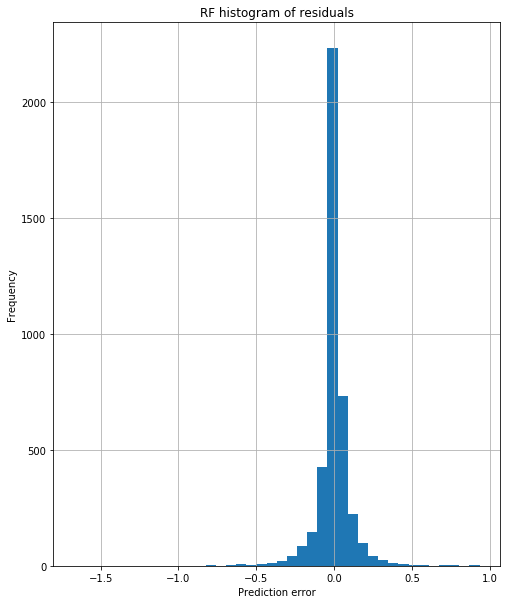

In [74]:
diff = y_test - predicted_rf
diff.hist(bins = 40)
plt.title('RF histogram of residuals')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

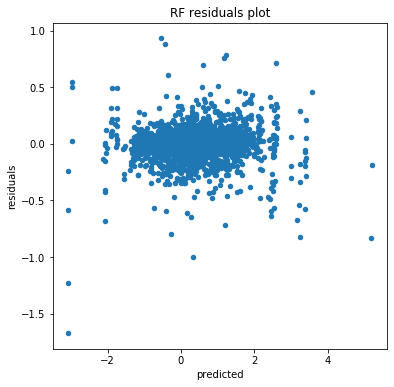

In [75]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
residuals_df = pd.DataFrame({"predicted": predicted_rf, "true": y_test})
residuals_df["residuals"] = residuals_df["true"] - residuals_df["predicted"]
residuals_df.plot(x = "predicted", y = "residuals", kind = "scatter", title = 'RF residuals plot')

Text(0.5, 1.0, 'RF QQ-Normal plot of residuals')

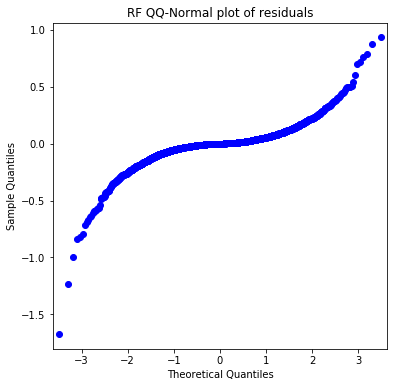

In [76]:
import statsmodels.api as sm

fig = plt.figure(figsize = (6,6))
fig.clf()
ax = fig.gca()
sm.qqplot(residuals_df['residuals'], ax = ax)
ax.set_title('RF QQ-Normal plot of residuals')

# **Neural Network**

Import necessary libraries and make a copy of our dataset on which we'll work from now on

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [0]:
indicators_lstm = indicators_fn.copy()

Do a 70-30 train-test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  indicators_lstm.drop(labels =['CountryName', 'GDP growth (annual %)'], axis = 1),
  indicators_lstm['GDP growth (annual %)'],
  test_size = 0.3,
  random_state = 0)

Construct our NN model, compile it and set checkpoints

In [0]:
model_nn = Sequential([
  Dense(32, 
        input_dim = len(X_train.columns), 
        kernel_initializer = 'normal', 
        activation = 'relu'),
  Dense(16, 
        kernel_initializer = 'normal', 
        activation = 'relu'),
  Dense(1, kernel_initializer = 'normal')
])

optimizer = Adam(lr = 0.0003)

model_nn.compile(optimizer = optimizer, 
                   loss = 'mean_squared_error')

import os
checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir) 

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_dir + '/model_nn.{epoch:05d}.hdf5'
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir = os.path.join('logs'),  
    write_graph = True, 
    update_freq = 'epoch'
)

Train the model

In [110]:
model_nn.fit(X_train[:-1681], 
             y_train[:-1681],
             epochs = 15, 
             batch_size = 1, 
             initial_epoch = 0,
             callbacks = [checkpoint_callback, tensorboard_callback],
             validation_data = (X_train[-1681:], y_train[-1681:]))

Train on 8000 samples, validate on 1681 samples
Epoch 1/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.3221 - val_loss: 0.2700
Epoch 2/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.1208 - val_loss: 0.1990
Epoch 3/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0747 - val_loss: 0.0550
Epoch 4/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0551 - val_loss: 0.0379
Epoch 5/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0441 - val_loss: 0.0229
Epoch 6/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0369 - val_loss: 0.0187
Epoch 7/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0315 - val_loss: 0.0788
Epoch 8/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0274 - val_loss: 0.0131
Epoch 9/15
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.0224 - val_loss: 0.0120
Epoch 1

Print the test loss and the MSE, MAE and the R^2 metrics

In [111]:
test_loss= model_nn.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', test_loss)

Test loss: 0.006464460743337539


In [0]:
predicted_nn = model_nn.predict(X_test)

In [0]:
predicted_nn = np.array([pred[0] for pred in predicted_nn])

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, log_loss

print('Mean squared error for RF:' + str(mean_squared_error(y_test_rf, predicted_rf)) + ' and MLP:' + str(mean_squared_error(y_test, predicted_nn)))

print('Mean absolute error for RF: ' + str(mean_absolute_error(y_test_rf, predicted_rf)) + ' and MLP:' + str(mean_absolute_error(y_test, predicted_nn)))

print('R-square metric for RF: ' + str(r2_score(y_test_rf, predicted_rf)) + ' and MLP:' + str(r2_score(y_test, predicted_nn)))

Mean squared error for RF:0.012647815128104005 and MLP:0.006464460772023538
Mean absolute error for RF: 0.05938609559672815 and MLP:0.05145575803979025
R-square metric for RF: 0.9834601632217717 and MLP:0.9915462769699294


Print the histogram of residuals, the scatter plot of residuals and qq normal plot

Text(0, 0.5, 'Frequency')

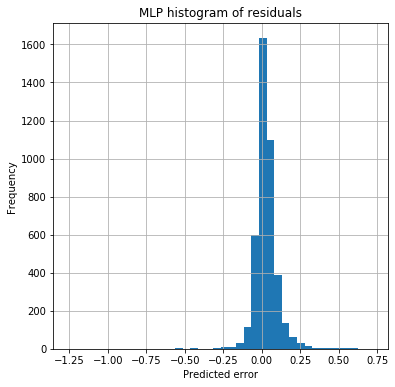

In [115]:
diff = y_test - predicted_nn
diff.hist(bins = 40)
plt.title('MLP histogram of residuals')
plt.xlabel('Predicted error')
plt.ylabel('Frequency')

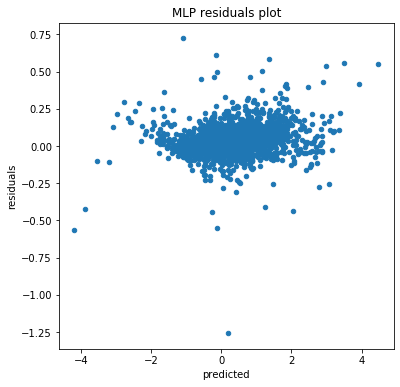

In [116]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
residuals_nn_df = pd.DataFrame({"predicted": predicted_nn, "true": y_test})
residuals_nn_df["residuals"] = residuals_nn_df["true"] - residuals_nn_df["predicted"]
residuals_nn_df.plot(x = "predicted", y = "residuals", kind = "scatter", title = 'MLP residuals plot')

Text(0.5, 1.0, 'MLP QQ-Normal plot of residuals')

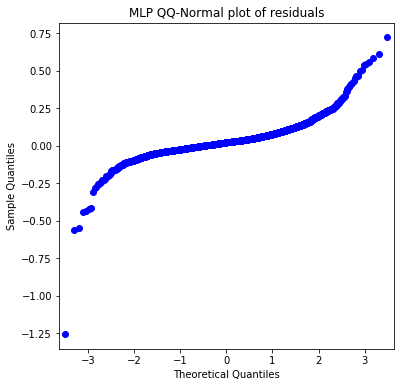

In [117]:
import statsmodels.api as sm

fig = plt.figure(figsize = (6,6))
fig.clf()
ax = fig.gca()
sm.qqplot(residuals_nn_df['residuals'], ax = ax)
ax.set_title('MLP QQ-Normal plot of residuals')

Create artificial plots of both the random forest's and the MLP's predictions. The points here are not necessarily drawn form the same country and have been plotted for the sake of visualizing our model's performance.

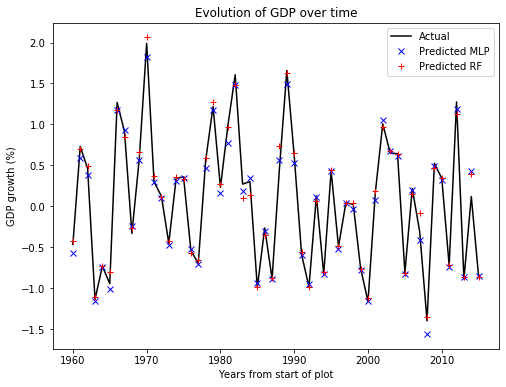

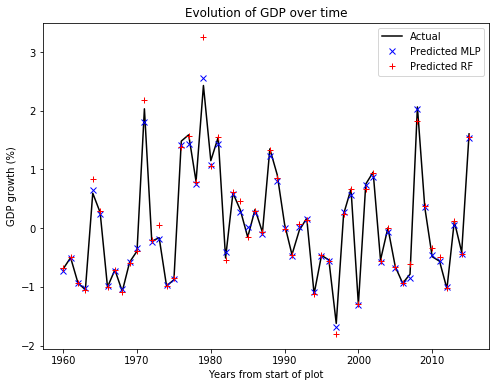

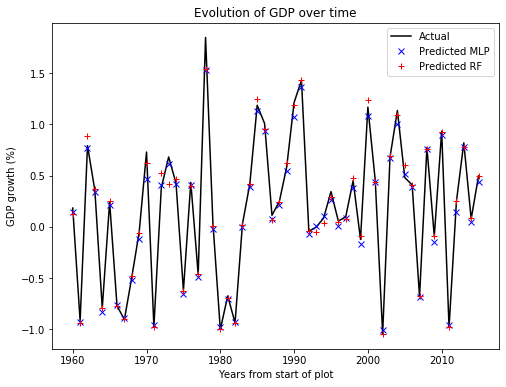

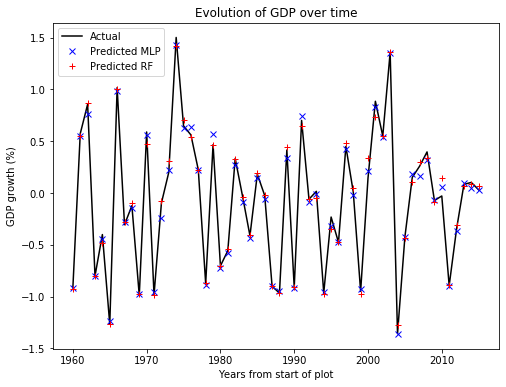

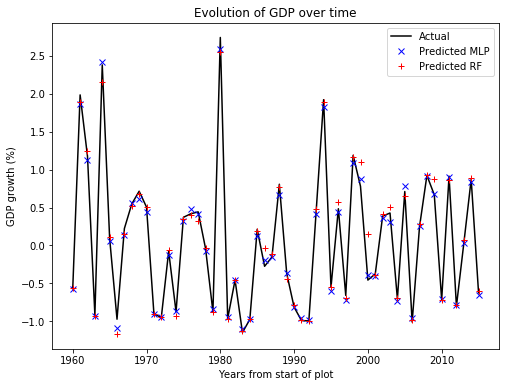

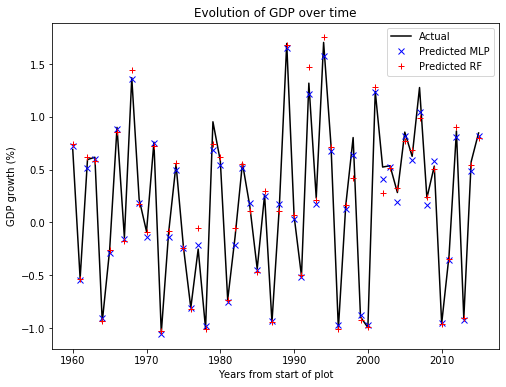

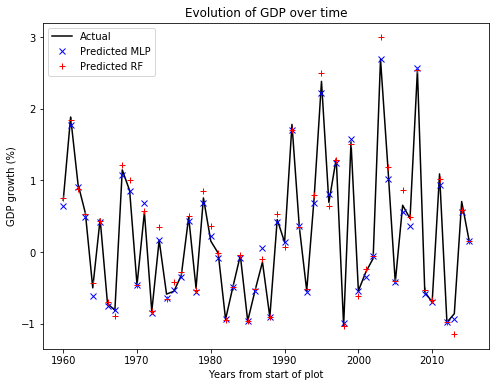

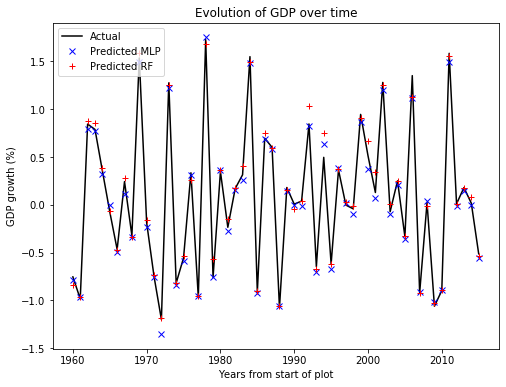

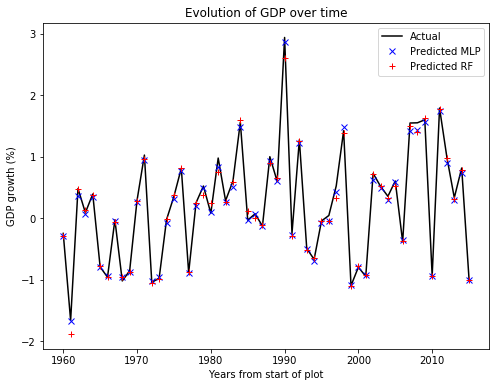

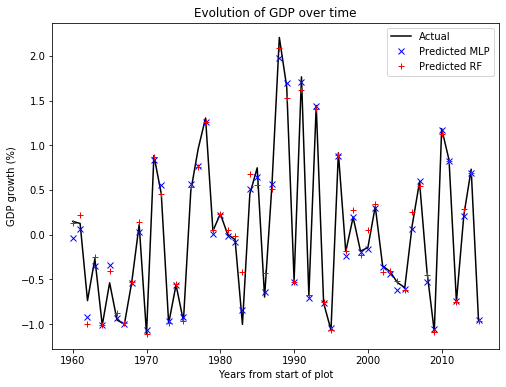

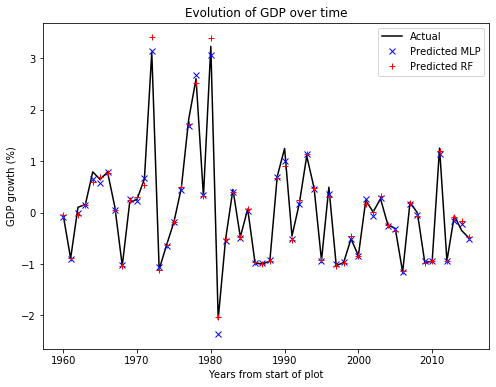

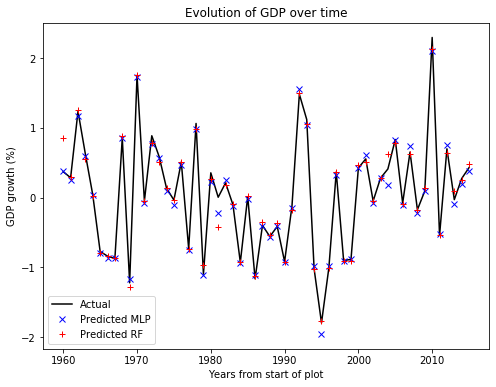

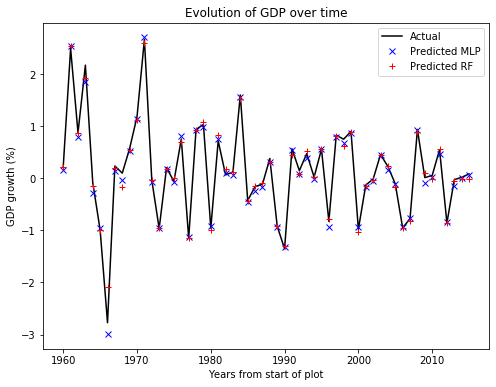

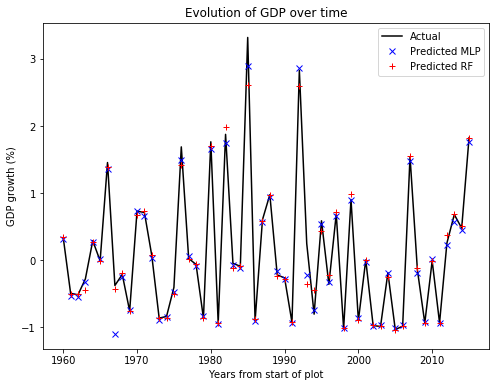

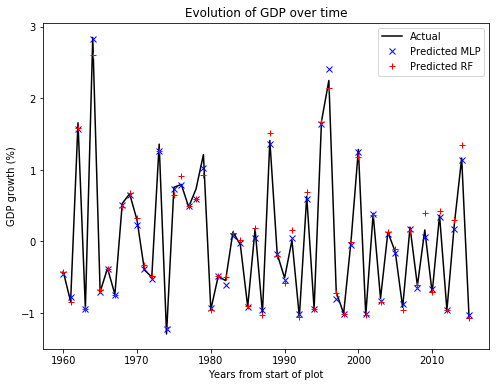

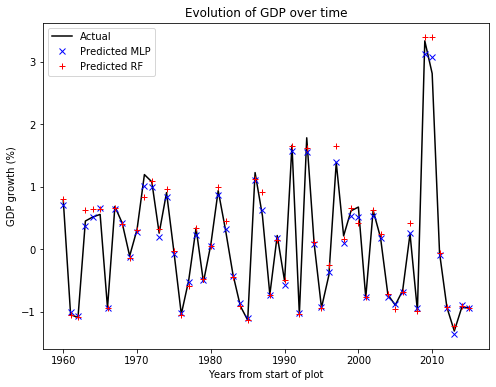

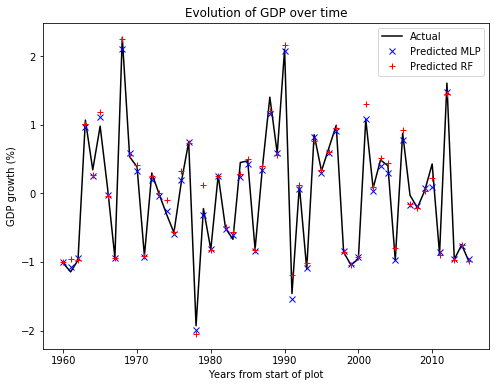

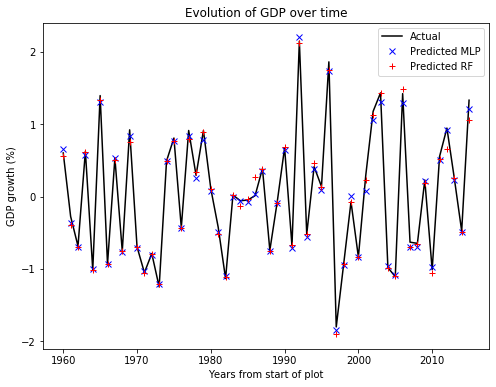

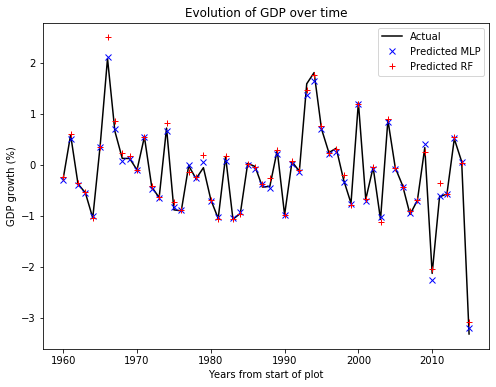

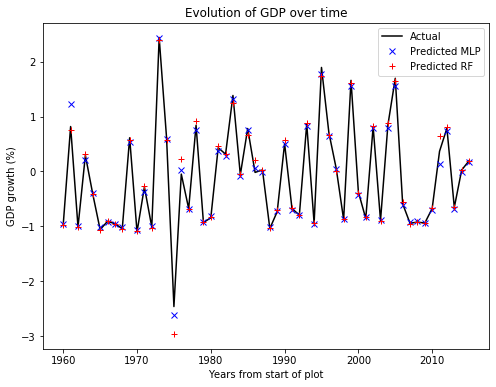

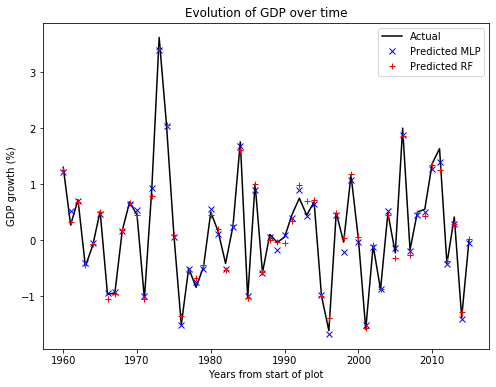

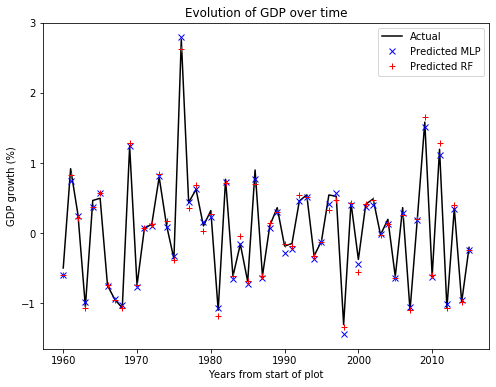

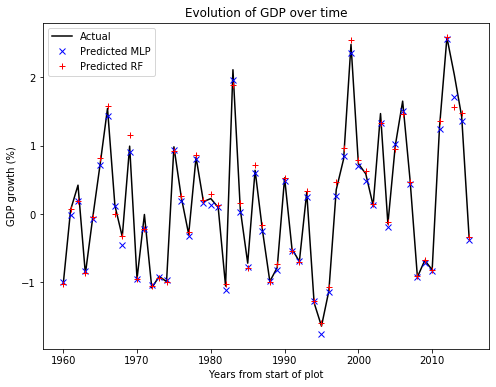

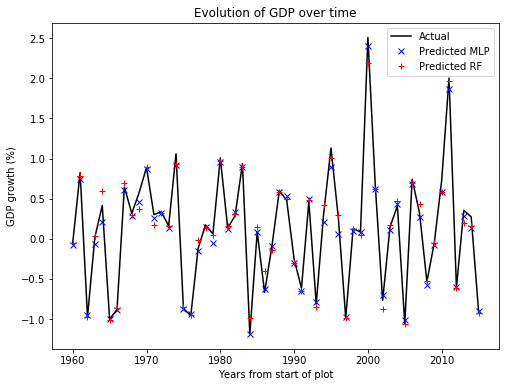

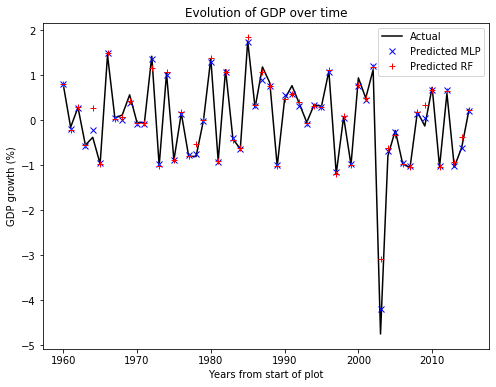

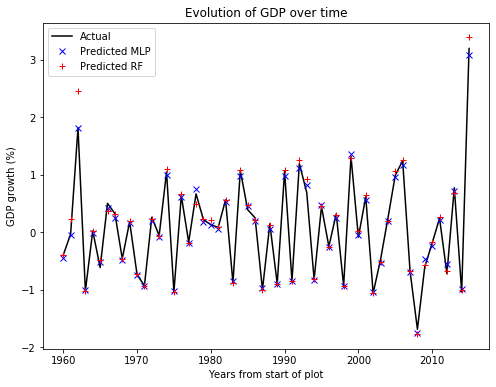

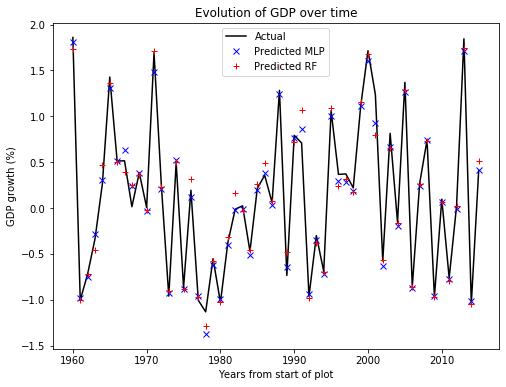

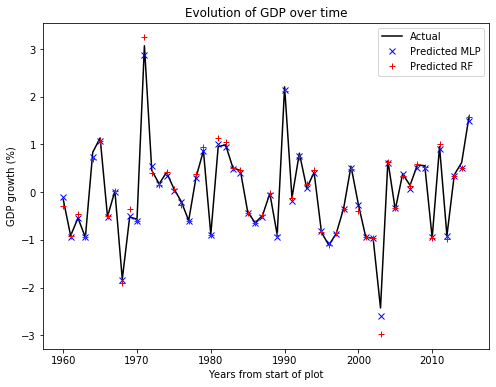

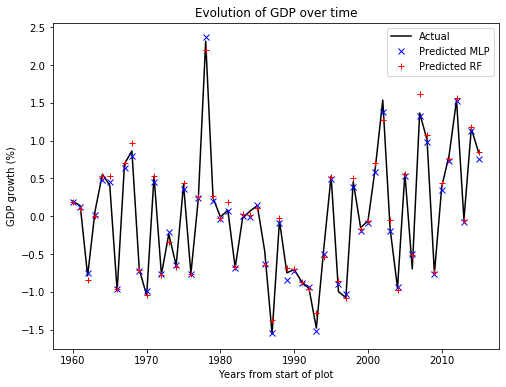

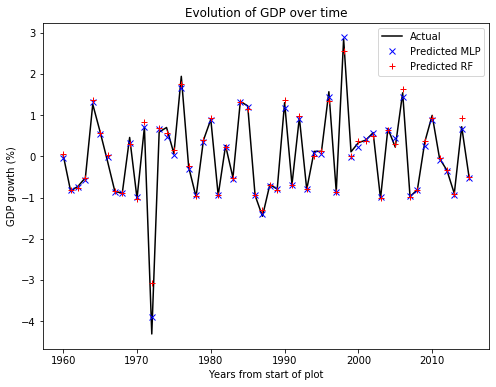

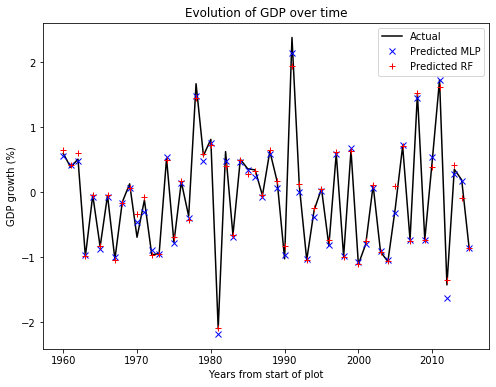

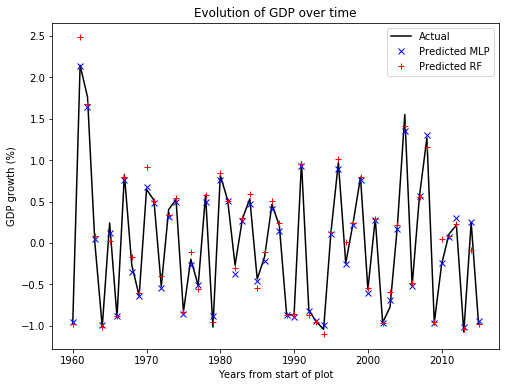

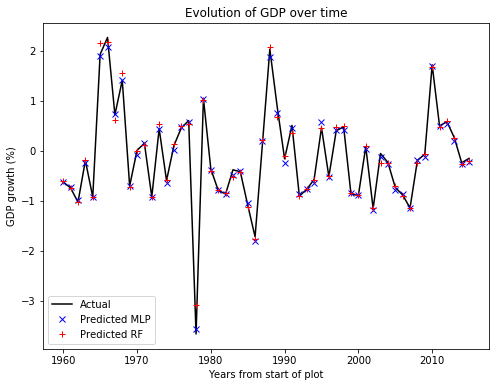

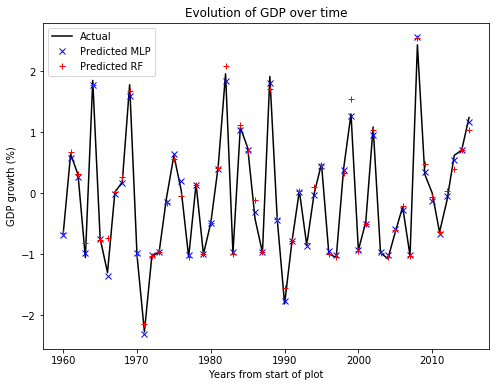

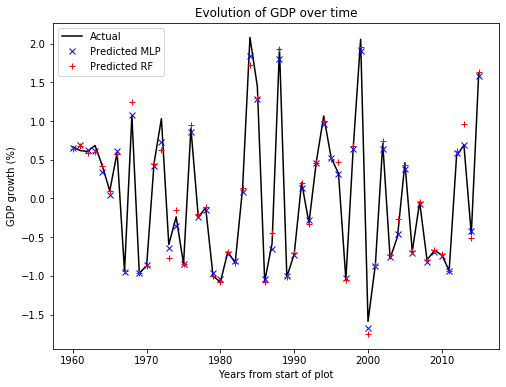

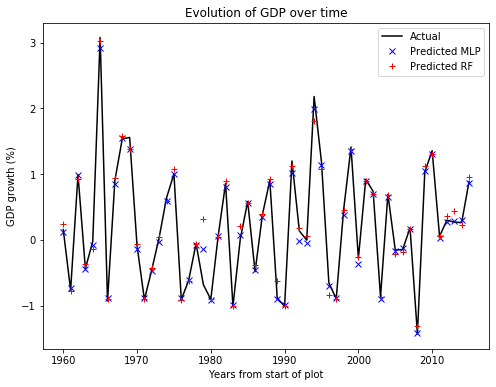

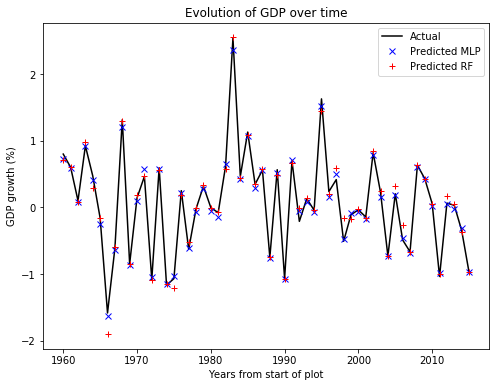

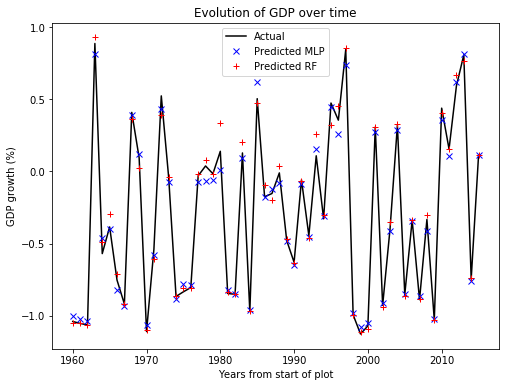

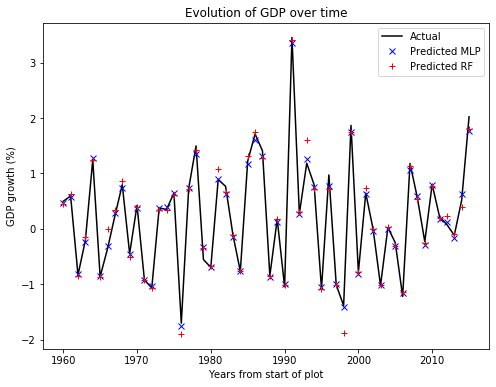

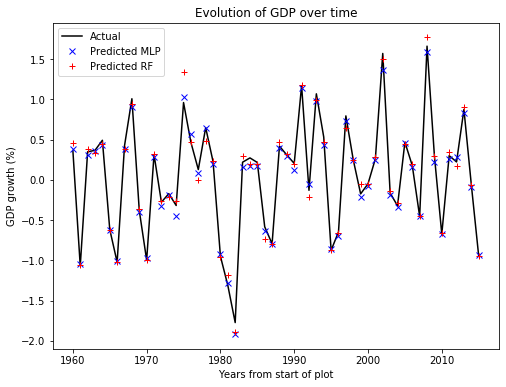

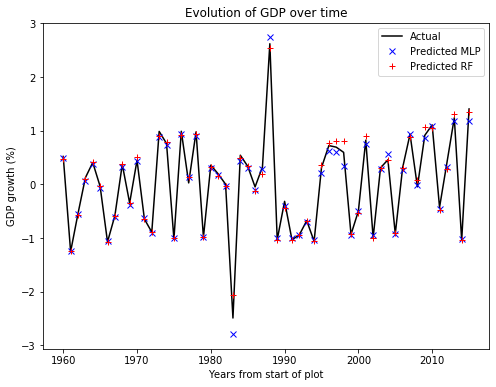

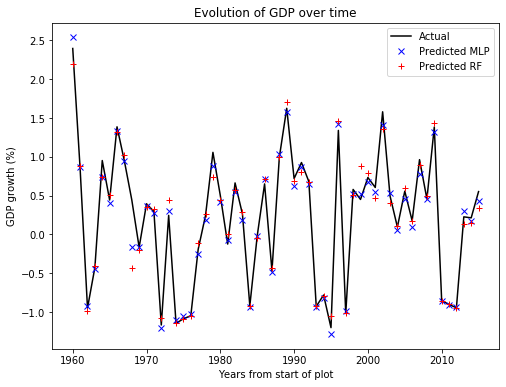

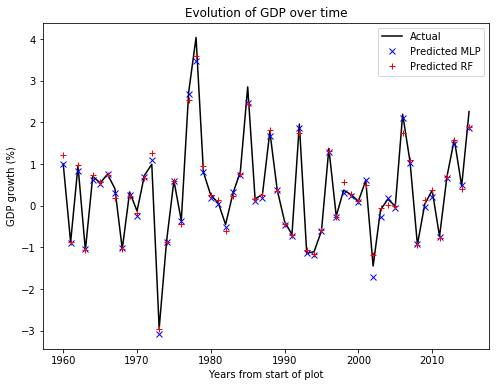

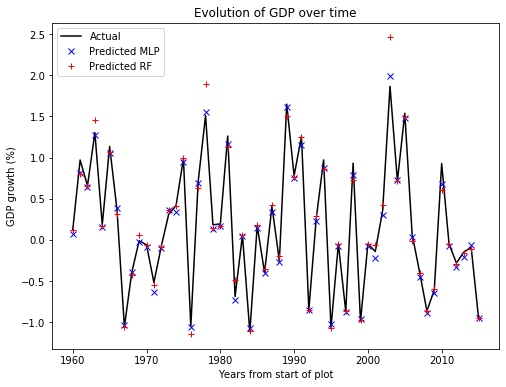

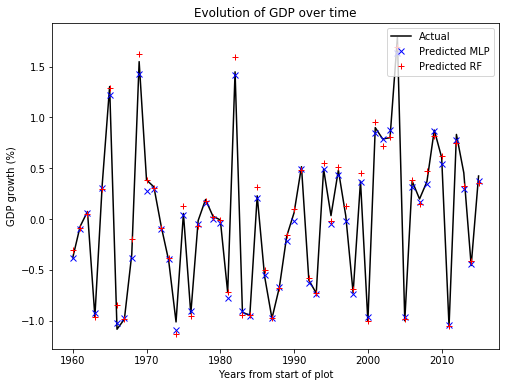

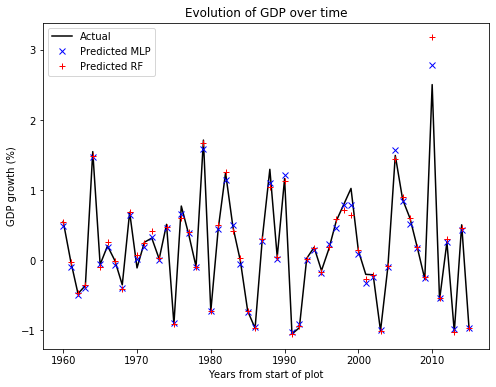

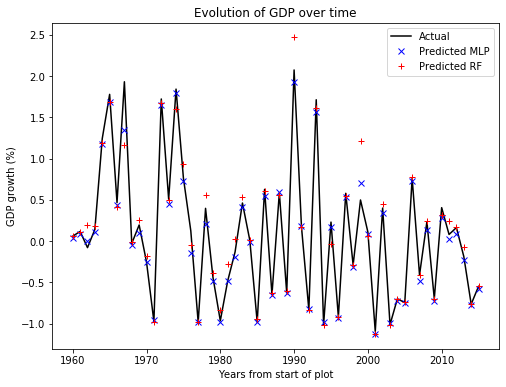

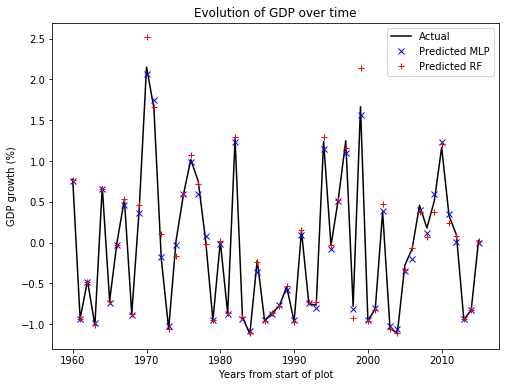

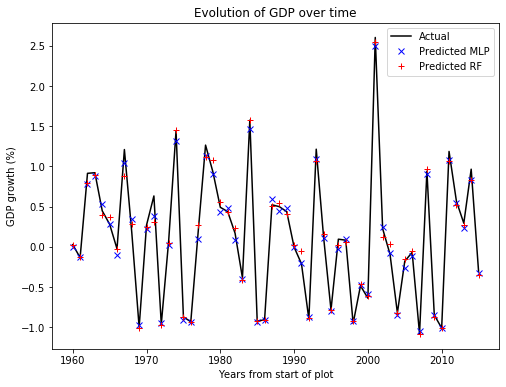

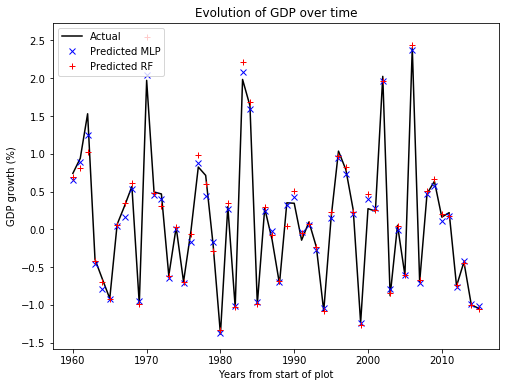

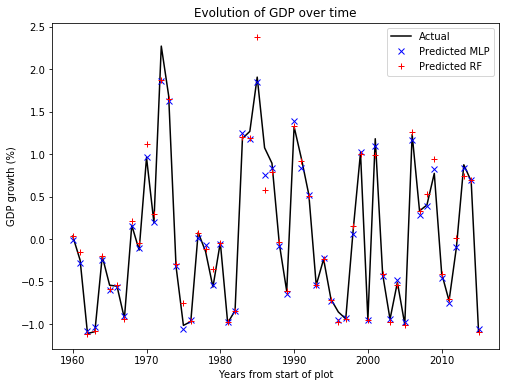

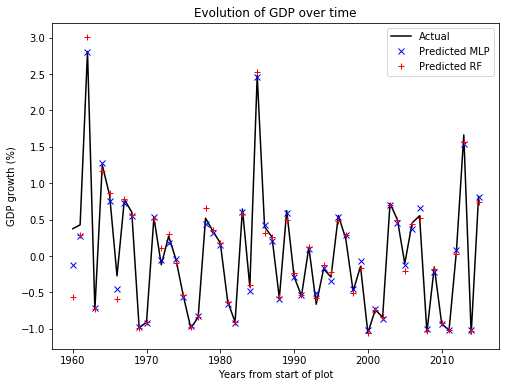

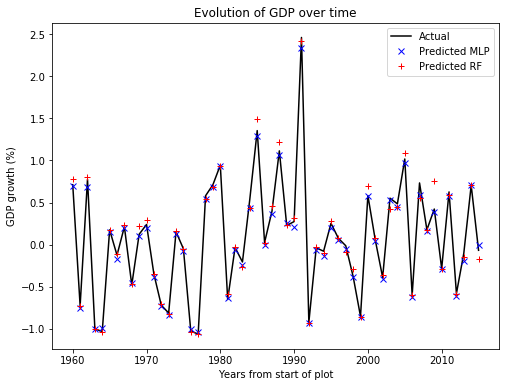

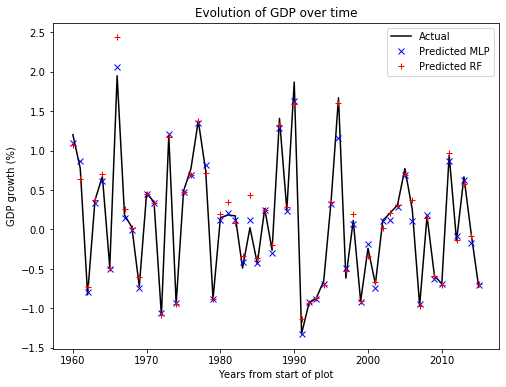

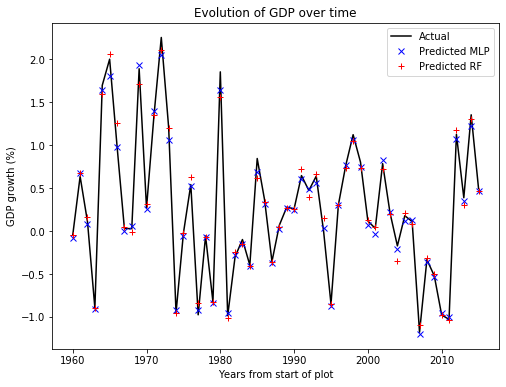

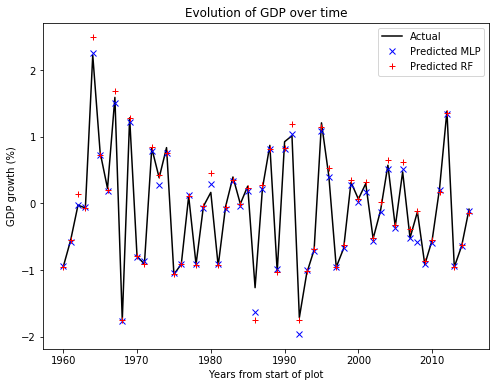

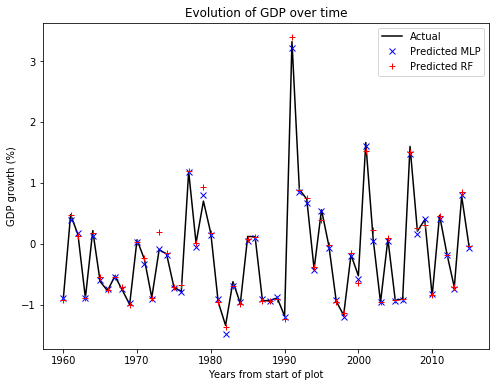

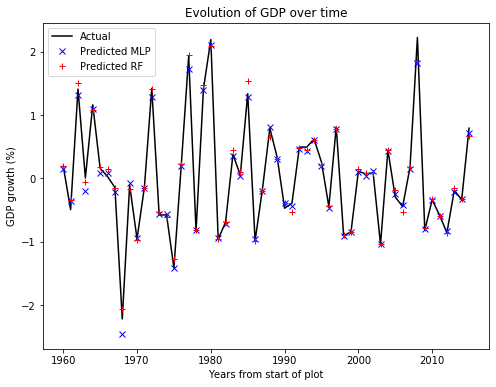

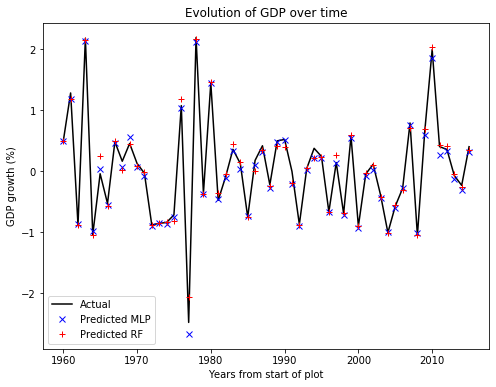

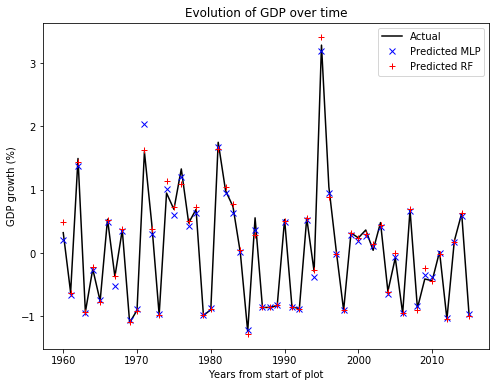

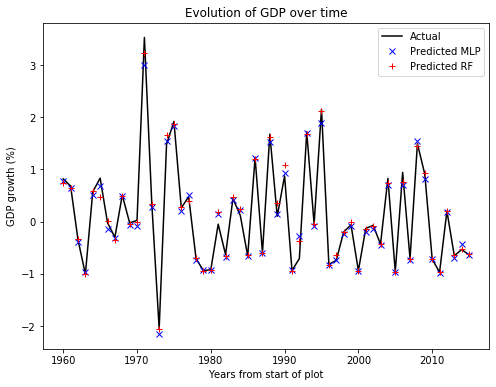

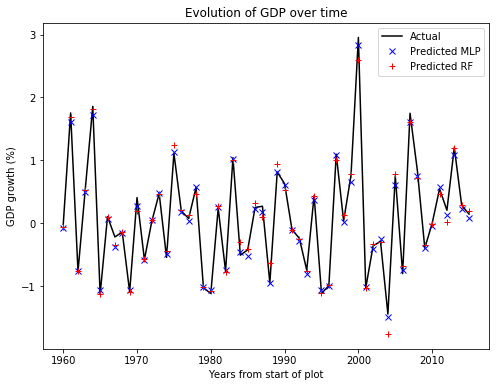

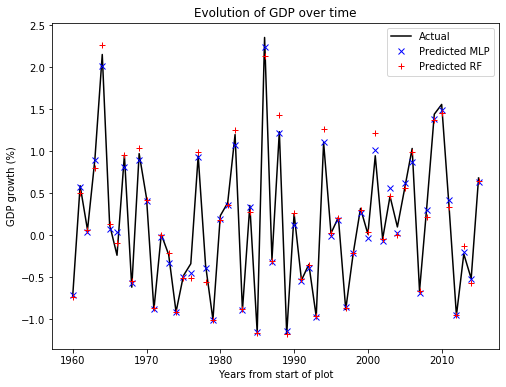

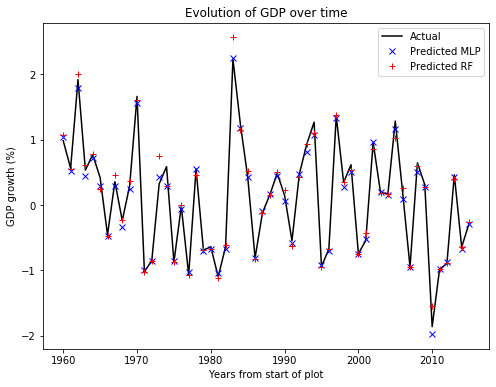

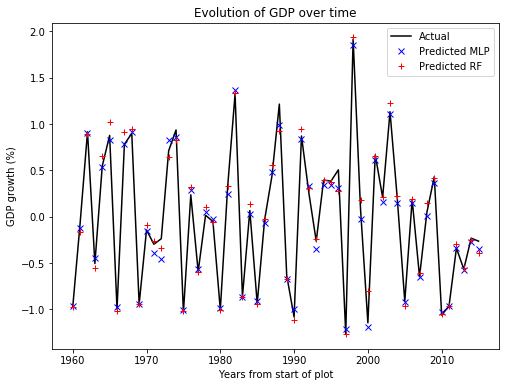

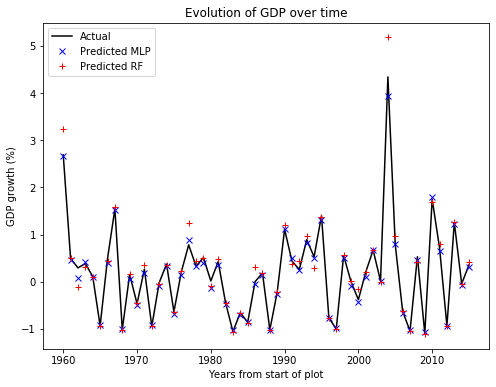

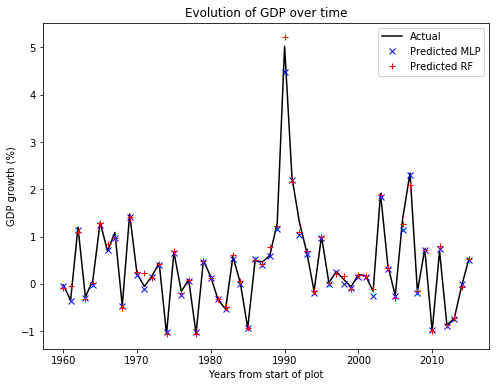

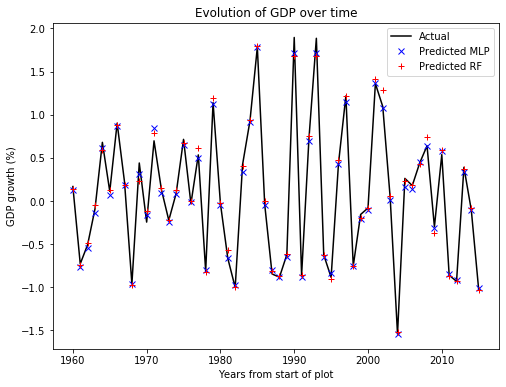

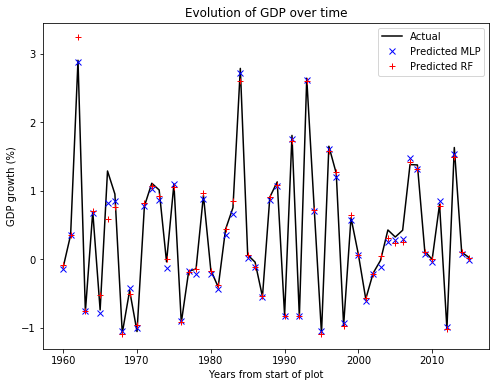

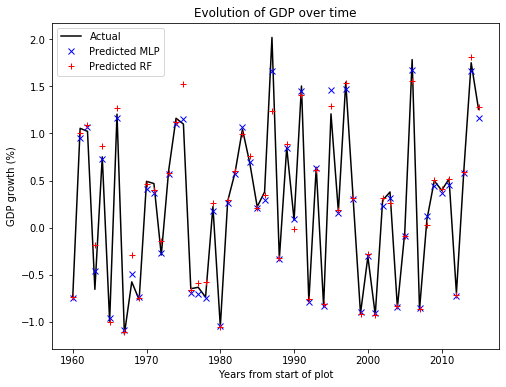

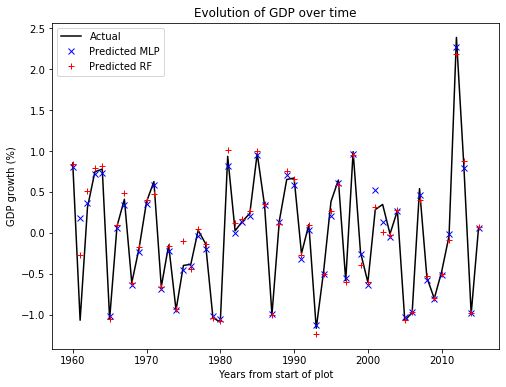

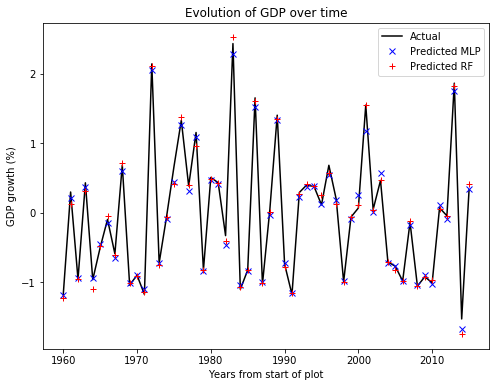

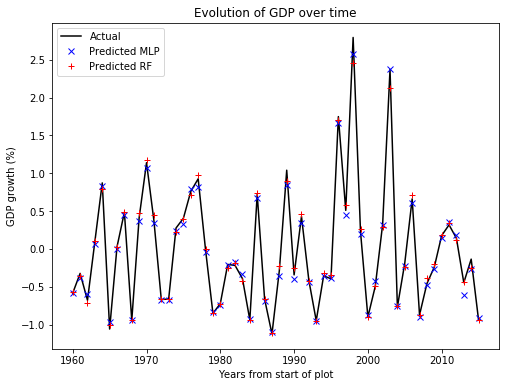

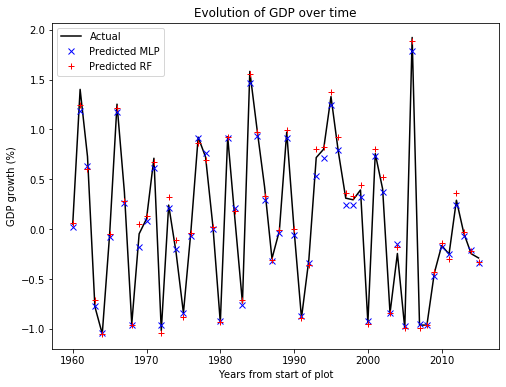

ValueError: ignored

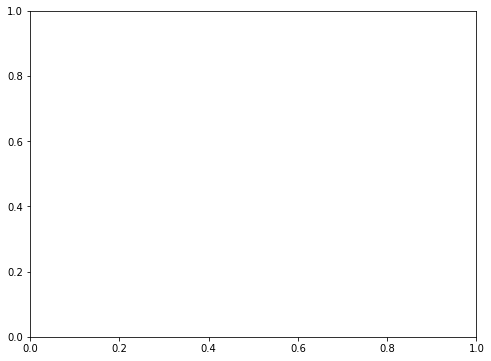

In [118]:
years = list(range(1960, 2016))

i = 0
j = 0

while i < predicted_nn.size:
  trues = y_test[j:(j + 56)]
  preds_nn = predicted_nn[j:(j + 56)]
  preds_rf = predicted_rf[j:(j + 56)]
  fig = plt.figure(figsize=(8, 6))
  fig.clf()
  ax = fig.gca()
  plt.plot(years, trues, color = 'black')
  plt.plot(years, preds_nn, 'bx')
  plt.plot(years, preds_rf, 'r+')
  plt.gca().legend(('Actual','Predicted MLP', 'Predicted RF'), loc = 'best')
  plt.xlabel("Years from start of plot")
  plt.ylabel("GDP growth (%)")
  plt.title("Evolution of GDP over time")
  plt.show()
  j += 56
  i += 56